# CNN Model with Full Train Dataset without Validation Set
# CNN Model with Dropout, Batch Normalization, No Early Stopping 

In [1]:
from matplotlib import pyplot as plt
from keras.datasets import mnist
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_X = pd.read_csv('train.csv')
test_X = pd.read_csv('test.csv' )
train_X.drop(train_X.columns[train_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_X.drop(test_X.columns[test_X.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

train_result = pd.read_csv('train_result.csv')
train_y_class = train_result['Class']

X_train = train_X.to_numpy()
X_test = test_X.to_numpy()
train_y = train_y_class.to_numpy()

print(train_y.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(50000, 1568)
(10000, 1568)


In [3]:
#X_train, X_val, train_y, val_y = train_test_split(X_train, train_y,  test_size=0.20, random_state=101)

In [4]:
print(X_train.shape)
#print(X_val.shape)
print(train_y.shape)
#print(val_y.shape)

(50000, 1568)
(50000,)


In [5]:
from tensorflow.keras.utils import to_categorical
c = len(np.unique(train_y))
y_train = to_categorical(train_y,c)
#y_val = to_categorical(val_y,c)

In [6]:
#y_train
#y_val

In [7]:
X_train = X_train.reshape(50000, 28, 56, 1)
#X_val = X_val.reshape(10000, 28, 56, 1)
X_test = X_test.reshape(10000, 28, 56, 1)
print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)

(50000, 28, 56, 1)
(10000, 28, 56, 1)


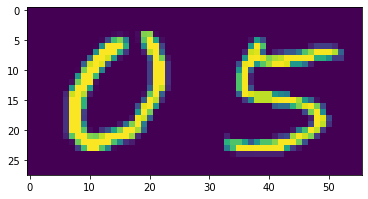

In [8]:
single_image = X_train[0]
plt.imshow(single_image)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [10]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
#model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
#Dropout Layer
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(28, 56, 1), activation='relu',))
#Batch Normaliation
model.add(BatchNormalization())
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
#Dropout Layer
model.add(Dropout(0.3))

# FLATTEN IMAGES  BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
#Batch Normaliation
model.add(BatchNormalization())
#Dropout Layer
model.add(Dropout(0.3))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(19, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 54, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 54, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 52, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 52, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 26, 64)       0         
 )                                                               
                                                        

In [12]:
#from tensorflow.keras.callbacks import EarlyStopping

In [13]:
#early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [15]:
print(X_train.shape)
#print(X_val.shape)
print(y_train.shape)
#print(y_val.shape)

(50000, 28, 56, 1)
(50000, 19)


In [17]:
epochs=100
#model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val, y_val),callbacks=[early_stop])
model.fit(X_train,y_train,epochs=epochs)

Epoch 1/100
1563/1563 [==============================] - 214s 135ms/step - loss: 2.2308 - accuracy: 0.2696
Epoch 2/100
1563/1563 [==============================] - 216s 138ms/step - loss: 1.3499 - accuracy: 0.5549
Epoch 3/100
1563/1563 [==============================] - 221s 141ms/step - loss: 0.9064 - accuracy: 0.7155
Epoch 4/100
1563/1563 [==============================] - 217s 139ms/step - loss: 0.6743 - accuracy: 0.7934
Epoch 5/100
1563/1563 [==============================] - 217s 139ms/step - loss: 0.5468 - accuracy: 0.8381
Epoch 6/100
1563/1563 [==============================] - 205s 131ms/step - loss: 0.4685 - accuracy: 0.8612
Epoch 7/100
1563/1563 [==============================] - 206s 132ms/step - loss: 0.4217 - accuracy: 0.8773
Epoch 8/100
1563/1563 [==============================] - 203s 130ms/step - loss: 0.3939 - accuracy: 0.8860
Epoch 9/100
1563/1563 [==============================] - 204s 130ms/step - loss: 0.3657 - accuracy: 0.8945
Epoch 10/100
1563/1563 [=============

Epoch 77/100
1563/1563 [==============================] - 205s 131ms/step - loss: 0.0669 - accuracy: 0.9800
Epoch 78/100
1563/1563 [==============================] - 206s 131ms/step - loss: 0.0779 - accuracy: 0.9774
Epoch 79/100
1563/1563 [==============================] - 202s 129ms/step - loss: 0.0751 - accuracy: 0.9788
Epoch 80/100
1563/1563 [==============================] - 202s 129ms/step - loss: 0.0743 - accuracy: 0.9778
Epoch 81/100
1563/1563 [==============================] - 212s 136ms/step - loss: 0.0750 - accuracy: 0.9782
Epoch 82/100
1563/1563 [==============================] - 207s 132ms/step - loss: 0.0681 - accuracy: 0.9806
Epoch 83/100
1563/1563 [==============================] - 207s 132ms/step - loss: 0.0668 - accuracy: 0.9803
Epoch 84/100
1563/1563 [==============================] - 208s 133ms/step - loss: 0.0742 - accuracy: 0.9781
Epoch 85/100
1563/1563 [==============================] - 209s 133ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 86/100
1563/1563 [====

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
losses = pd.DataFrame(model.history.history)

In [20]:
losses.head()

,loss,accuracy
0,2.230813,0.26962
1,1.349896,0.55490
2,0.906373,0.71554
3,0.674331,0.79340
4,0.546809,0.83814


<AxesSubplot:>

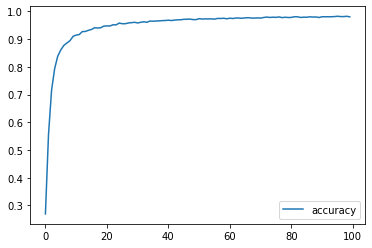

In [22]:
losses[['accuracy']].plot()

<AxesSubplot:>

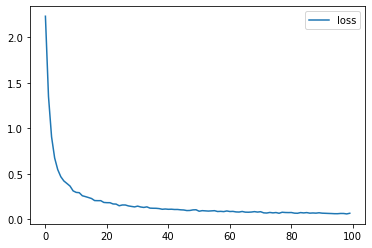

In [23]:
losses[['loss']].plot()

<AxesSubplot:>

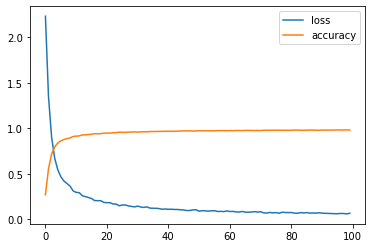

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [25]:
#print(model.metrics_names)
#print(model.evaluate(X_val,y_val,verbose=0))

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
#predictions = np.argmax(model.predict(X_val),axis=1)
#predictions

In [28]:
#print(classification_report(val_y,predictions))

In [29]:
#confusion_matrix = confusion_matrix(val_y,predictions)
#confusion_matrix

In [30]:
#misclassification_error(confusion_matrix):
#sum_preds = np.sum(confusion_matrix)
#sum_correct = np.sum(np.diag(confusion_matrix))
#misclassification_error = 1.0 - (float(sum_correct) / float(sum_preds))
    
#print("sum_preds               :", int(sum_preds)) 
#print("sum_correct_predictions :", int(sum_correct)) 
#print("sum_wrong_predictions   :", int(sum_preds - sum_correct))
#print("misclassification_error :", misclassification_error)

In [31]:
#my_number = X_val[999]
#plt.imshow(my_number)

In [32]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_number.reshape(1,28,56,1))

#predict_x=model.predict(my_number.reshape(1,28,56,1)) 
#classes_x=np.argmax(predict_x,axis=1)
#print(classes_x)

In [33]:
print('\n')
print("Test Predictions")
test_predictions =  np.argmax(model.predict(X_test),axis=1)
print(test_predictions)
print(len(test_predictions))
print(type(test_predictions))
df = pd.DataFrame(test_predictions)
df.index.name= 'Index'
df.columns = ['Class']
file_name = f'test_predictions_cnn_model4-Dropout-batchnorm-NoEarlyStop-FullDataSet-NoVal.csv'
df.to_csv(file_name, index=True)
df



Test Predictions
313/313 [==============================] - 10s 30ms/step
[14  7 10 ... 10  4  6]
10000
<class 'numpy.ndarray'>


,Class
Index,
0,14
1,7
2,10
3,7
4,5
...,...
9995,7
9996,12
9997,10
